In [119]:
import numpy as np
import pandas as pd
import random
from simulate_matches import simulate_matches
from utils import *
from probabilities import *
import matplotlib.pyplot as plt
from scipy.special import comb

random.seed(42)

## Partida 1
Nessa partida, $p=0.75$ e, consequentemente, $q=0.25$

In [2]:
p1 = 0.75
simulate_matches('matches_1.csv', p1, 120)
df_1 = pd.read_csv('matches_1.csv')

### Caracterização inicial

In [14]:
a, b = matches_won(df_1)

print(f'A won {100*a/(a+b):.2f}% matches')
print(f'B won {100*b/(a+b):.2f}% matches')

A won 100.00% matches
B won 0.00% matches


In [15]:
a, b = sets_won(df_1)

print(f'A won {100*a/(a+b):.2f}% of the sets')
print(f'B won {100*b/(a+b):.2f}% of the sets')

A won 100.00% of the sets
B won 0.00% of the sets


In [16]:
a, b = games_won(df_1)

print(f'A won {100*a/(a+b):.2f}% of the games')
print(f'B won {100*b/(a+b):.2f}% of the games')

A won 94.24% of the games
B won 5.76% of the games


In [17]:
a, b = points_scored(df_1)

print(f'A scored {100*a/(a+b):.2f}% of the points')
print(f'B scored {100*b/(a+b):.2f}% of the points')

A scored 74.63% of the points
B scored 25.37% of the points


### Análise das vitórias dos jogadores

Vamos fazer uma análise da probabilidade de cada jogador ganhar na partida 1. Para isso, vamos dividir o nosso dataset em 3 e verificar, de 3 em 3 partidas, quantas o jogador A e o jogador B ganham:

In [141]:
n = len(df_1['match'].unique())//3

won_a_1_120 = np.ndarray(n, dtype=int)
won_b_1_120 = np.ndarray(n, dtype=int)

for i in range(n):
    matches = df_1[df_1['match'].isin([3*i, 3*i+1, 3*i+2])]
    (won_a_1_120[i], won_b_1_120[i]) = matches_won(matches)

print(f'Player A won {np.sum(won_a_1_120)} and Player B won {np.sum(won_b_1_120)}')

Player A won 120 and Player B won 0


Vamos calcular o valor médio de vitórias a cada 3 partidas, assim como o desvio padrão para a nossa amostra

In [4]:
print(f'A\'s average: {np.mean(won_a_1_120)}\nA\'s standard deviation: {np.std(won_a_1_120)}')
print(f'B\'s average: {np.mean(won_b_1_120)}\nB\'s standard deviation: {np.std(won_b_1_120)}')

A's average: 3.0
A's standard deviation: 0.0
B's average: 0.0
B's standard deviation: 0.0


Como podemos ver, em 3 partidas, é esperado que o jogador A ganhe as 3, enquanto o jogador B não ganha nenhuma. Em ambos os casos, o desvio padrão é 0, o que significa que A ou ganha as 3 partidas sempre ou que ele ganha com tanta frequência que a nossa amostra não foi capaz de capturar um caso em que ele perde. O mesmo vale para B.

### Probabilidades analíticas

Vamos analisar o jogo como uma Cadeia de Markov e calcular a probabilidade real dos jogadores ganharem as partidas:

In [5]:
pa1 = match_probability(p=p1)
pb1 = 1-pa1
print(f'Probability of A to win a match: {pa1}')
print(f'Probability of B to win a match: {pb1}')

Probability of A to win a match: 0.9999999999999997
Probability of B to win a match: 3.3306690738754696e-16


A probabilidade de um jogador ganhar a partida é dada por $ \mu = \sum {x_i*P(x_i)} $, sendo que $P(x_i)$ é a probabilidade do jogador ganhar um número $x_i$ de partidas (nesse caso, $x_i = i$). Essas probabilidade são, para o jogador A e B respectivamente, dadas pelas seguintes expressões:

$$ P_A(x_i) = \binom{3}{i}(1-p_a)^{3-i}*p_a^i,\space i=0,1,2,3 $$
$$ P_B(x_i) = \binom{3}{i}(1-p_a)^i*p_a^{3-i},\space i=0,1,2,3 $$

Onde $p_a$ é a probabilidade do jogador A ganhar uma partida. O desvio padrão é dado por $ \sigma = \sqrt { \sum {(x_i - \mu)^2*P(x_i)} } $, onde $\mu$ é o valor médio do número de partidas ganhas. Uma análise analítica mais aprofundada sobre pontos, games, sets e partidas com possibilidade de tie break pode ser encontrada no [link](https://datagenetics.com/blog/august12018/index.html).

Vamos, então, computar os valores médios e desvios padrões reais para A e B:

In [6]:
x = [0, 1, 2, 3]
pa = [prob_n_outof(xi, 3, pa1) for xi in x]
pb = list(reversed(pa))

mean_a = np.sum([xi*pi for pi,xi in zip(pa,x)])
mean_b = np.sum([xi*pi for pi,xi in zip(pb,x)])

std_a = (np.sum([ (xi - mean_a)**2*pi for pi,xi in zip(pa,x) ]))**0.5
std_b = (np.sum([ (xi - mean_b)**2*pi for pi,xi in zip(pb,x) ]))**0.5

print(f'A\'s real average: {mean_a:.4e}\nA\'s real standard deviation: {std_a:.4e}')
print(f'B\'s real average: {mean_b:.4e}\nB\'s real standard deviation: {std_b:.4e}')

A's real average: 3.0000e+00
A's real standard deviation: 3.1610e-08
B's real average: 9.9920e-16
B's real standard deviation: 3.1610e-08


Percebemos que, realmente, o valor médio de partidas ganhas é muito próximo de 3 para A e muito próximo de 0 para B. O desvio padrão para ambos é, também, muito próximo de 0.

Vamos observar a relação entre $p$ e $p_a$ (além da probabilidade de se ganhar um game e um set):

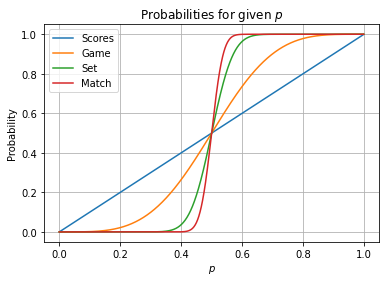

In [7]:
ps = np.arange(0, 1, 0.001)
pas = np.array([match_probability(p) for p in ps])
pss = np.array([set_probability(p) for p in ps])
pgs = np.array([game_probability(p) for p in ps])

fig, ax = plt.subplots()
ax.plot(ps, ps, label='Scores');
ax.plot(ps, pgs, label='Game');
ax.plot(ps, pss, label='Set');
ax.plot(ps, pas, label='Match');

ax.legend();
ax.set_title('Probabilities for given $p$');
ax.set_xlabel('$p$');
ax.set_ylabel('Probability');
ax.grid()

Como podemos ver, a probabilidade do jogador ganhar a partida é extremamente sensível à diferença de habilidade dos jogadores $p$. Além disso, percebemos que a sensibilidade à $p$ aumenta quando observamos a probabilidade de se ganhar um ponto, um jogo e um set.

### Análise de sets, games e pontos

Podemos realizar também análises individuais a cerca dos sets, games e pontos, verificando o impacto da diferença entre os jogadores nos resultados.

In [142]:
n = 120

set_a_1_120 = np.ndarray(n, dtype=int)
set_b_1_120 = np.ndarray(n, dtype=int)

game_a_1_120 = np.ndarray(n, dtype=int)
game_b_1_120 = np.ndarray(n, dtype=int)

point_a_1_120 = np.ndarray(n, dtype=int)
point_b_1_120 = np.ndarray(n, dtype=int)

for i in range(n):
    matches = df_1[df_1['match'] == i]
    (set_a_1_120[i], set_b_1_120[i]) = sets_won(matches)
    (game_a_1_120[i],game_b_1_120[i]) = games_won(matches)
    (point_a_1_120[i],point_b_1_120[i]) = points_scored(matches)

print(f'Player A won {100*np.sum(set_a_1_120)/(np.sum(set_a_1_120) + np.sum(set_b_1_120)):.2f}% sets and Player B won {100*np.sum(set_b_1_120)/(np.sum(set_a_1_120) + np.sum(set_b_1_120)):.2f}% sets')
print(f'Player A won {100*np.sum(game_a_1_120)/(np.sum(game_a_1_120) + np.sum(game_b_1_120)):.2f}% games and Player B won {100*np.sum(game_b_1_120)/(np.sum(game_a_1_120) + np.sum(game_b_1_120)):.2f}% games')
print(f'Player A won {100*np.sum(point_a_1_120)/(np.sum(point_a_1_120) + np.sum(point_b_1_120)):.2f}% points and Player B won {100*np.sum(point_b_1_120)/(np.sum(point_a_1_120) + np.sum(point_b_1_120)):.2f}% points')

Player A won 100.00% sets and Player B won 0.00% sets
Player A won 95.36% games and Player B won 4.64% games
Player A won 75.36% points and Player B won 24.64% points


Observa-se que além de perder todos os jogos, o segundo jogador também perdeu todos os sets. Nos games é possível observar os primeiros resultados positivos deste jogador, e nos pontos tem-se uma proporção próxima da probabilidade de cada jogador.

In [143]:
print(f'A\'s average: {np.mean(set_a_1_120):.2f}\nA\'s standard deviation: {np.std(set_a_1_120):.2f}')
print(f'B\'s average: {np.mean(set_b_1_120):.2f}\nB\'s standard deviation: {np.std(set_b_1_120):.2f}')

A's average: 2.00
A's standard deviation: 0.00
B's average: 0.00
B's standard deviation: 0.00


O resultado acima é o esperado, visto que o jogador B não ganhou nenhum set. Já observando os games, podemos notar diferenças:

In [144]:
print(f'A\'s average: {np.mean(game_a_1_120):.2f}\nA\'s standard deviation: {np.std(game_a_1_120):.2f}')
print(f'B\'s average: {np.mean(game_b_1_120):.2f}\nB\'s standard deviation: {np.std(game_b_1_120):.2f}')

A's average: 12.00
A's standard deviation: 0.00
B's average: 0.58
B's standard deviation: 0.85


Já é possível perceber valores de média para B diferentes de 0, porém ainda muito baixos em relação ao jogador vencedor. Nos pontos tem-se maior proximidade entre os jogadores:

In [145]:
print(f'A\'s average: {np.mean(point_a_1_120):.2f}\nA\'s standard deviation: {np.std(point_a_1_120):.2f}')
print(f'B\'s average: {np.mean(point_b_1_120):.2f}\nB\'s standard deviation: {np.std(point_b_1_120):.2f}')

A's average: 51.50
A's standard deviation: 3.00
B's average: 16.84
B's standard deviation: 5.97


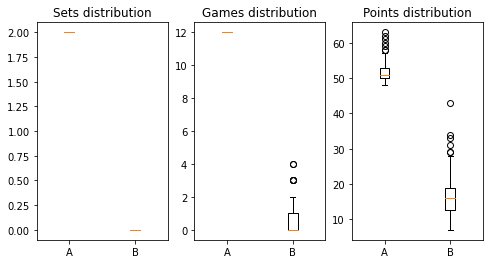

In [146]:
fig, ax = plt.subplots(ncols=3, figsize=(8, 4))

ax[0].boxplot([set_a_1_120, set_b_1_120], labels=['A', 'B']);
ax[0].set_title('Sets distribution')

ax[1].boxplot([game_a_1_120, game_b_1_120], labels=['A', 'B']);
ax[1].set_title('Games distribution')

ax[2].boxplot([point_a_1_120, point_b_1_120], labels=['A', 'B']);
ax[2].set_title('Points distribution');

E assim podemos concluir que uma probabilidade maior de marcar pontos contra o adversário resulta em probabilidades ainda muito mais expressivas de vitória quando relacionadas a partes maiores do jogo, como games e sets.

## Partida 2
Agora, $p=0.52$ e $q=0.48$

In [12]:
p2 = 0.52
simulate_matches('matches_2.csv', p2, 120)
df_2 = pd.read_csv('matches_2.csv')

### Caracterização inicial

In [13]:
a, b = matches_won(df_2)

print(f'A won {100*a/(a+b):.2f}% of the matches')
print(f'B won {100*b/(a+b):.2f}% of the matches')

A won 70.00% of the matches
B won 30.00% of the matches


In [14]:
a, b = sets_won(df_2)

print(f'A won {100*a/(a+b):.2f}% of the sets')
print(f'B won {100*b/(a+b):.2f}% of the sets')

A won 64.00% of the sets
B won 36.00% of the sets


In [15]:
a, b = games_won(df_2)

print(f'A won {100*a/(a+b):.2f}% of the games')
print(f'B won {100*b/(a+b):.2f}% of the games')

A won 55.01% of the games
B won 44.99% of the games


In [16]:
a, b = points_scored(df_2)

print(f'A scored {100*a/(a+b):.2f}% of the points')
print(f'B scored {100*b/(a+b):.2f}% of the points')

A scored 52.02% of the points
B scored 47.98% of the points


### Análise do número de vitórias para a partida 2

In [147]:
n = len(df_2['match'].unique())//3

won_a_2_120 = np.ndarray(n, dtype=int)
won_b_2_120 = np.ndarray(n, dtype=int)

for i in range(n):
    matches = df_2[df_2['match'].isin([3*i, 3*i+1, 3*i+2])]
    (won_a_2_120[i], won_b_2_120[i]) = matches_won(matches)

print(f'Player A won {np.sum(won_a_2_120)} and Player B won {np.sum(won_b_2_120)}')

Player A won 84 and Player B won 36


Vamos verificar a média de vitórias em cada 3 partidas para $p=0.52$

In [148]:
print(f'A\'s average: {np.mean(won_a_2_120):.4f}\nA\'s standard deviation: {np.std(won_a_2_120):.4f}')
print(f'B\'s average: {np.mean(won_b_2_120):.4f}\nB\'s standard deviation: {np.std(won_b_2_120):.4f}')

A's average: 2.1000
A's standard deviation: 0.8307
B's average: 0.9000
B's standard deviation: 0.8307


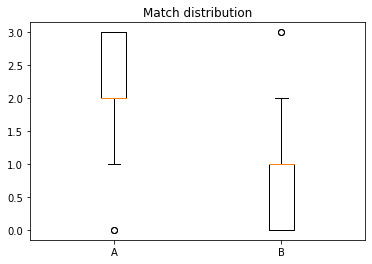

In [149]:
fig, ax = plt.subplots()

ax.boxplot([won_a_2_120, won_b_2_120], labels=['A', 'B']);
ax.set_title('Match distribution');

Percebemos que, agora, os dois jogadores possuem habilidades bem similares, o que significa que o jogador B possui muito mais chances de vencer. Ainda assim, o jogador A possui muita vantagem em cima do jogador B, ganhando 2 em 3 partidas.

### Valores reais de probabilidade

Novamente, vamos calcular analiticamente a média de jogos ganhos dentre os 3:

In [150]:
p2a = match_probability(p=0.52)
p2b = 1-p2a
print(f'Probability of A to win a match: {p2a:.4f}')
print(f'Probability of B to win a match: {p2b:.4f}')

Probability of A to win a match: 0.7493
Probability of B to win a match: 0.2507


In [72]:
x = [0, 1, 2, 3]
pa = [prob_n_outof(xi, 3, p2a) for xi in x]
pb = list(reversed(pa))

mean_a = np.sum([xi*pi for pi,xi in zip(pa,x)])
mean_b = np.sum([xi*pi for pi,xi in zip(pb,x)])


std_a = (np.sum([ (xi - mean_a)**2*pi for pi,xi in zip(pa,x) ]))**0.5
std_b = (np.sum([ (xi - mean_b)**2*pi for pi,xi in zip(pb,x) ]))**0.5

print(f'A\'s real average: {mean_a:.4f}\nA\'s real standard deviation: {std_a:.4f}')
print(f'B\'s real average: {mean_b:.4f}\nB\'s real standard deviation: {std_b:.4f}')

A's real average: 2.2478
A's real standard deviation: 0.7507
B's real average: 0.7522
B's real standard deviation: 0.7507


Percebemos que os valores obtidos da análise da simulação é bem próximo do que foi obtido analiticamente.

Novamente, observamos a sensibilidade da vitória à probabilidade $p$. Com uma diferença de apenas $0.04$ de habilidade, o jogador A consegue vencer pelo menos duas partidas em cada 3.

### Análise de sets, games e pontos para a partida 2

Como realizado na partida 1, verificaremos os efeitos das probabilidades de ponto na quantidade de sets, games e pontos ganhos na partida 2.

In [151]:
n=120

set_a_2_120 = np.ndarray(n, dtype=int)
set_b_2_120 = np.ndarray(n, dtype=int)

game_a_2_120 = np.ndarray(n, dtype=int)
game_b_2_120 = np.ndarray(n, dtype=int)

point_a_2_120 = np.ndarray(n, dtype=int)
point_b_2_120 = np.ndarray(n, dtype=int)

for i in range(n):
    matches = df_2[df_2['match'] == i]
    (set_a_2_120[i], set_b_2_120[i]) = sets_won(matches)
    (game_a_2_120[i],game_b_2_120[i]) = games_won(matches)
    (point_a_2_120[i],point_b_2_120[i]) = points_scored(matches)

print(f'Player A won {100*np.sum(set_a_2_120)/(np.sum(set_a_2_120) + np.sum(set_b_2_120)):.2f}% sets and Player B won {100*np.sum(set_b_2_120)/(np.sum(set_a_2_120) + np.sum(set_b_2_120)):.2f}% sets')
print(f'Player A won {100*np.sum(game_a_2_120)/(np.sum(game_a_2_120) + np.sum(game_b_2_120)):.2f}% games and Player B won {100*np.sum(game_b_2_120)/(np.sum(game_a_2_120) + np.sum(game_b_2_120)):.2f}% games')
print(f'Player A won {100*np.sum(point_a_2_120)/(np.sum(point_a_2_120) + np.sum(point_b_2_120)):.2f}% points and Player B won {100*np.sum(point_b_2_120)/(np.sum(point_a_2_120) + np.sum(point_b_2_120)):.2f}% points')

Player A won 64.00% sets and Player B won 36.00% sets
Player A won 55.01% games and Player B won 44.99% games
Player A won 52.02% points and Player B won 47.98% points


Percebe-se que as probabilidades próximas também aproximam consideravelmente as vitórias dentro do jogo em níveis além da partida, apresentando resultados interessantes.

In [152]:
print(f'A\'s average: {np.mean(set_a_2_120):.2f}\nA\'s standard deviation: {np.std(set_a_2_120):.2f}')
print(f'B\'s average: {np.mean(set_b_2_120):.2f}\nB\'s standard deviation: {np.std(set_b_2_120):.2f}')

A's average: 1.60
A's standard deviation: 0.66
B's average: 0.90
B's standard deviation: 0.83


Nos sets conseguimos observar valores não tão distantes de média e muito próximos de desvio padrão, mostrando assim regularidade nas simulações. Podemos com isso, esperar comportamento semelhante nos games e pontos:

In [153]:
print(f'A\'s average: {np.mean(game_a_2_120):.2f}\nA\'s standard deviation: {np.std(game_a_2_120):.2f}')
print(f'B\'s average: {np.mean(game_b_2_120):.2f}\nB\'s standard deviation: {np.std(game_b_2_120):.2f}')

A's average: 13.14
A's standard deviation: 3.01
B's average: 10.75
B's standard deviation: 4.41


In [154]:
print(f'A\'s average: {np.mean(point_a_2_120):.2f}\nA\'s standard deviation: {np.std(point_a_2_120):.2f}')
print(f'B\'s average: {np.mean(point_b_2_120):.2f}\nB\'s standard deviation: {np.std(point_b_2_120):.2f}')

A's average: 83.38
A's standard deviation: 20.47
B's average: 76.90
B's standard deviation: 24.36


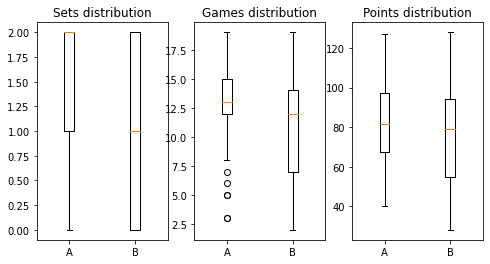

In [155]:
fig, ax = plt.subplots(ncols=3, figsize=(8, 4))

ax[0].boxplot([set_a_2_120, set_b_2_120], labels=['A', 'B']);
ax[0].set_title('Sets distribution')

ax[1].boxplot([game_a_2_120, game_b_2_120], labels=['A', 'B']);
ax[1].set_title('Games distribution')

ax[2].boxplot([point_a_2_120, point_b_2_120], labels=['A', 'B']);
ax[2].set_title('Points distribution');

Como esperado, conseguimos ver que as médias e os desvios entre os dois jogadores são próximos em todas as medidas, demonstrando assim consistência nos resultados obtidos pela simulação.

## Análise com 12 amostras

Realizaremos agora análises com apenas 12 amostras, com o intuito de observar como a limitação do número de simulações pode afetar nos resultados finais de média e desvio padrão.

### Partida 1

In [156]:
won_a_1_12 = np.ndarray(4, dtype=int)
won_b_1_12 = np.ndarray(4, dtype=int)

set_a_1_12 = np.ndarray(12, dtype=int)
set_b_1_12 = np.ndarray(12, dtype=int)

game_a_1_12 = np.ndarray(12, dtype=int)
game_b_1_12 = np.ndarray(12, dtype=int)

point_a_1_12 = np.ndarray(12, dtype=int)
point_b_1_12 = np.ndarray(12, dtype=int)

random.seed(42)
samples = random.sample(range(0, 120), 12)

for i in range(4):
  matches = df_1[df_1['match'].isin([samples[i*3], samples[i*3+1], samples[i*3+2]])]
  (won_a_1_12[i], won_b_1_12[i]) = matches_won(matches)

for i in range(12):
  matches = df_1[df_1['match'] == samples[i]]
  (set_a_1_12[i], set_b_1_12[i]) = sets_won(matches)
  (game_a_1_12[i],game_b_1_12[i]) = games_won(matches)
  (point_a_1_12[i],point_b_1_12[i]) = points_scored(matches)

print(f'Player A won {np.sum(won_a_1_12)} matches and Player B won {np.sum(won_b_1_12)} matches')
print(f'Player A won {np.sum(set_a_1_12)} sets and Player B won {np.sum(set_b_1_12)} sets')
print(f'Player A won {np.sum(game_a_1_12)} games and Player B won {np.sum(game_b_1_12)} games')
print(f'Player A won {np.sum(point_a_1_12)} points and Player B won {np.sum(point_b_1_12)} points')

Player A won 12 matches and Player B won 0 matches
Player A won 24 sets and Player B won 0 sets
Player A won 144 games and Player B won 13 games
Player A won 628 points and Player B won 225 points


In [192]:
print(f'n=12\nA\'s average: {np.mean(won_a_1_12):.4f}\nA\'s standard deviation: {np.std(won_a_1_12):.4f}')
print(f'B\'s average: {np.mean(won_b_1_12):.4f}\nB\'s standard deviation: {np.std(won_b_1_12):.4f}')

print(f'\nn=120\nA\'s average: {np.mean(won_a_1_12):.4f}\nA\'s standard deviation: {np.std(won_a_1_12):.4f}')
print(f'B\'s average: {np.mean(won_b_1_12):.4f}\nB\'s standard deviation: {np.std(won_b_1_12):.4f}')

n=12
A's average: 3.0000
A's standard deviation: 0.0000
B's average: 0.0000
B's standard deviation: 0.0000

n=120
A's average: 3.0000
A's standard deviation: 0.0000
B's average: 0.0000
B's standard deviation: 0.0000


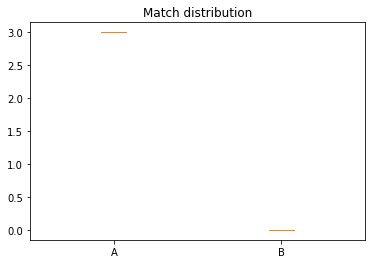

In [158]:
fig, ax = plt.subplots()

ax.boxplot([won_a_1_12, won_b_1_12], labels=['A', 'B']);
ax.set_title('Match distribution');

In [191]:
print(f'n=12\nA\'s average: {np.mean(set_a_1_12):.2f}\nA\'s standard deviation: {np.std(set_a_1_12):.2f}')
print(f'B\'s average: {np.mean(set_b_1_12):.2f}\nB\'s standard deviation: {np.std(set_b_1_12):.2f}')

print(f'\nn=120\nA\'s average: {np.mean(set_a_1_12):.2f}\nA\'s standard deviation: {np.std(set_a_1_12):.2f}')
print(f'B\'s average: {np.mean(set_b_1_12):.2f}\nB\'s standard deviation: {np.std(set_b_1_12):.2f}')

n=12
A's average: 2.00
A's standard deviation: 0.00
B's average: 0.00
B's standard deviation: 0.00

n=120
A's average: 2.00
A's standard deviation: 0.00
B's average: 0.00
B's standard deviation: 0.00


In [190]:
print(f'n=12\nA\'s average: {np.mean(game_a_1_12):.2f}\nA\'s standard deviation: {np.std(game_a_1_12):.2f}')
print(f'B\'s average: {np.mean(game_b_1_12):.2f}\nB\'s standard deviation: {np.std(game_b_1_12):.2f}')

print(f'\nn=120\nA\'s average: {np.mean(game_a_1_120):.2f}\nA\'s standard deviation: {np.std(game_a_1_120):.2f}')
print(f'B\'s average: {np.mean(game_b_1_120):.2f}\nB\'s standard deviation: {np.std(game_b_1_120):.2f}')

n=12
A's average: 12.00
A's standard deviation: 0.00
B's average: 1.08
B's standard deviation: 1.11

n=120
A's average: 12.00
A's standard deviation: 0.00
B's average: 0.58
B's standard deviation: 0.85


In [188]:
print(f'n=12\nA\'s average: {np.mean(point_a_1_12):.2f}\nA\'s standard deviation: {np.std(point_a_1_12):.2f}')
print(f'B\'s average: {np.mean(point_b_1_12):.2f}\nB\'s standard deviation: {np.std(point_b_1_12):.2f}')

print(f'\nn=120\nA\'s average: {np.mean(point_a_1_120):.2f}\nA\'s standard deviation: {np.std(point_a_1_120):.2f}')
print(f'B\'s average: {np.mean(point_b_1_120):.2f}\nB\'s standard deviation: {np.std(point_b_1_120):.2f}')

n=12
A's average: 52.33
A's standard deviation: 2.75
B's average: 18.75
B's standard deviation: 5.66

n=120
A's average: 51.50
A's standard deviation: 3.00
B's average: 16.84
B's standard deviation: 5.97


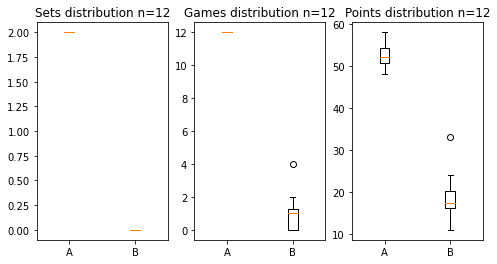

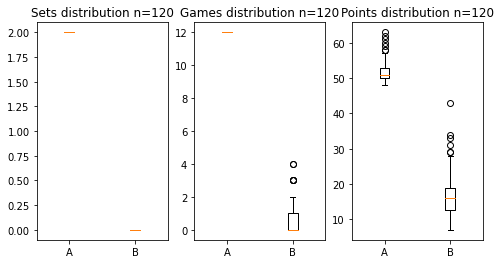

In [193]:
fig, ax = plt.subplots(ncols=3, figsize=(8, 4))

ax[0].boxplot([set_a_1_12, set_b_1_12], labels=['A', 'B']);
ax[0].set_title('Sets distribution n=12')

ax[1].boxplot([game_a_1_12, game_b_1_12], labels=['A', 'B']);
ax[1].set_title('Games distribution n=12')

ax[2].boxplot([point_a_1_12, point_b_1_12], labels=['A', 'B']);
ax[2].set_title('Points distribution n=12');


fig, ax = plt.subplots(ncols=3, figsize=(8, 4))

ax[0].boxplot([set_a_1_120, set_b_1_120], labels=['A', 'B']);
ax[0].set_title('Sets distribution n=120')

ax[1].boxplot([game_a_1_120, game_b_1_120], labels=['A', 'B']);
ax[1].set_title('Games distribution n=120')

ax[2].boxplot([point_a_1_120, point_b_1_120], labels=['A', 'B']);
ax[2].set_title('Points distribution n=120');

Percebemos principalmente nos pontos uma diferença considerável no desvio padrão dos resultados, sendo superiores principalmente na contagem de pontos.

### Partida 2

In [165]:
won_a_2_12 = np.ndarray(4, dtype=int)
won_b_2_12 = np.ndarray(4, dtype=int)

set_a_2_12 = np.ndarray(12, dtype=int)
set_b_2_12 = np.ndarray(12, dtype=int)

game_a_2_12 = np.ndarray(12, dtype=int)
game_b_2_12 = np.ndarray(12, dtype=int)

point_a_2_12 = np.ndarray(12, dtype=int)
point_b_2_12 = np.ndarray(12, dtype=int)

random.seed(42)
samples = random.sample(range(0, 120), 12)

for i in range(4):
  matches = df_2[df_2['match'].isin([samples[i*3], samples[i*3+1], samples[i*3+2]])]
  (won_a_2_12[i], won_b_2_12[i]) = matches_won(matches)

for i in range(12):
  matches = df_2[df_2['match'] == samples[i]]
  (set_a_2_12[i], set_b_2_12[i]) = sets_won(matches)
  (game_a_2_12[i],game_b_2_12[i]) = games_won(matches)
  (point_a_2_12[i],point_b_2_12[i]) = points_scored(matches)

print(f'Player A won {np.sum(won_a_2_12)} matches and Player B won {np.sum(won_b_2_12)} matches')
print(f'Player A won {np.sum(set_a_2_12)} sets and Player B won {np.sum(set_b_2_12)} sets')
print(f'Player A won {np.sum(game_a_2_12)} games and Player B won {np.sum(game_b_2_12)} games')
print(f'Player A won {np.sum(point_a_2_12)} points and Player B won {np.sum(point_b_2_12)} points')

Player A won 9 matches and Player B won 3 matches
Player A won 19 sets and Player B won 9 sets
Player A won 156 games and Player B won 125 games
Player A won 1032 points and Player B won 951 points


In [194]:
print(f'n=12\nA\'s average: {np.mean(won_a_2_12):.4f}\nA\'s standard deviation: {np.std(won_a_2_12):.4f}')
print(f'B\'s average: {np.mean(won_b_2_12):.4f}\nB\'s standard deviation: {np.std(won_b_2_12):.4f}')

print(f'\nn=120\nA\'s average: {np.mean(won_a_2_120):.4f}\nA\'s standard deviation: {np.std(won_a_2_120):.4f}')
print(f'B\'s average: {np.mean(won_b_2_120):.4f}\nB\'s standard deviation: {np.std(won_b_2_120):.4f}')

n=12
A's average: 2.2500
A's standard deviation: 0.4330
B's average: 0.7500
B's standard deviation: 0.4330

n=120
A's average: 2.1000
A's standard deviation: 0.8307
B's average: 0.9000
B's standard deviation: 0.8307


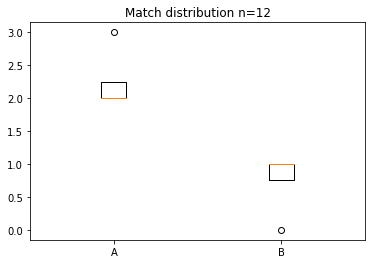

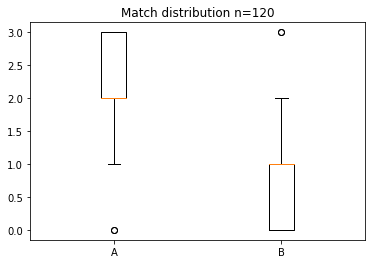

In [195]:
fig, ax = plt.subplots()

ax.boxplot([won_a_2_12, won_b_2_12], labels=['A', 'B']);
ax.set_title('Match distribution n=12');

fig, ax = plt.subplots()

ax.boxplot([won_a_2_120, won_b_2_120], labels=['A', 'B']);
ax.set_title('Match distribution n=120');

In [196]:
print(f'n=12\nA\'s average: {np.mean(set_a_2_12):.2f}\nA\'s standard deviation: {np.std(set_a_2_12):.2f}')
print(f'B\'s average: {np.mean(set_b_2_12):.2f}\nB\'s standard deviation: {np.std(set_b_2_12):.2f}')

print(f'\nn=120\nA\'s average: {np.mean(set_a_2_120):.2f}\nA\'s standard deviation: {np.std(set_a_2_120):.2f}')
print(f'B\'s average: {np.mean(set_b_2_120):.2f}\nB\'s standard deviation: {np.std(set_b_2_120):.2f}')

n=12
A's average: 1.58
A's standard deviation: 0.76
B's average: 0.75
B's standard deviation: 0.83

n=120
A's average: 1.60
A's standard deviation: 0.66
B's average: 0.90
B's standard deviation: 0.83


In [184]:
print(f'n=12\nA\'s average: {np.mean(game_a_2_12):.2f}\nA\'s standard deviation: {np.std(game_a_2_12):.2f}')
print(f'B\'s average: {np.mean(game_b_2_12):.2f}\nB\'s standard deviation: {np.std(game_b_2_12):.2f}')

print(f'\nn=120\nA\'s average: {np.mean(game_a_2_120):.2f}\nA\'s standard deviation: {np.std(game_a_2_120):.2f}')
print(f'B\'s average: {np.mean(game_b_2_120):.2f}\nB\'s standard deviation: {np.std(game_b_2_120):.2f}')

n=12
A's average: 13.00
A's standard deviation: 3.81
B's average: 10.42
B's standard deviation: 4.80

n=120
A's average: 13.14
A's standard deviation: 3.01
B's average: 10.75
B's standard deviation: 4.41


In [186]:
print(f'n=12\nA\'s average: {np.mean(point_a_2_12):.2f}\nA\'s standard deviation: {np.std(point_a_2_12):.2f}')
print(f'B\'s average: {np.mean(point_b_2_12):.2f}\nB\'s standard deviation: {np.std(point_b_2_12):.2f}')

print(f'\nn=120\nA\'s average: {np.mean(point_a_2_120):.2f}\nA\'s standard deviation: {np.std(point_a_2_120):.2f}')
print(f'B\'s average: {np.mean(point_b_2_120):.2f}\nB\'s standard deviation: {np.std(point_b_2_120):.2f}')

n=12
A's average: 86.00
A's standard deviation: 26.14
B's average: 79.25
B's standard deviation: 27.83

n=120
A's average: 83.38
A's standard deviation: 20.47
B's average: 76.90
B's standard deviation: 24.36


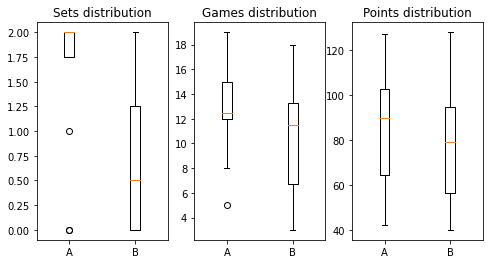

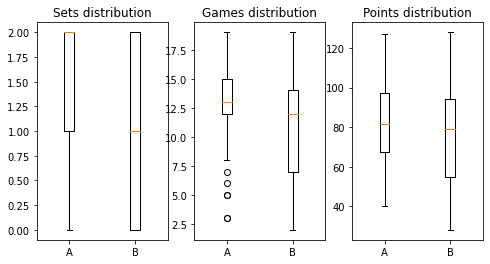

In [176]:
fig, ax = plt.subplots(ncols=3, figsize=(8, 4))

ax[0].boxplot([set_a_2_12, set_b_2_12], labels=['A', 'B']);
ax[0].set_title('Sets distribution')

ax[1].boxplot([game_a_2_12, game_b_2_12], labels=['A', 'B']);
ax[1].set_title('Games distribution')

ax[2].boxplot([point_a_2_12, point_b_2_12], labels=['A', 'B']);
ax[2].set_title('Points distribution');

fig, ax = plt.subplots(ncols=3, figsize=(8, 4))

ax[0].boxplot([set_a_2_120, set_b_2_120], labels=['A', 'B']);
ax[0].set_title('Sets distribution')

ax[1].boxplot([game_a_2_120, game_b_2_120], labels=['A', 'B']);
ax[1].set_title('Games distribution')

ax[2].boxplot([point_a_2_120, point_b_2_120], labels=['A', 'B']);
ax[2].set_title('Points distribution');

Já na segunda partida, vemos que os resultados não apresentam alteração significativa. Isso pode ser percebido principalmente pelo fato da probabilidade igual de cada jogador ganhar um ponto.